Notebook testing the use of `ScanBlocks`.

In [1]:
import numpy as np
from dysh.fits.gbtfitsload import GBTFITSLoad

In [2]:
# Point it to the testdata directory on the root dysh directory.
example_data = "/home/dysh/example_data/"
example_data = "/bigdisk/data/gbt/examples/"
# The folder with multiple SDFITS files.
data_path = f"{example_data}/onoff-L/data/TGBT21A_501_11.raw.vegas/TGBT21A_501_11.raw.vegas.A.fits"
print(data_path)

/bigdisk/data/gbt/examples//onoff-L/data/TGBT21A_501_11.raw.vegas/TGBT21A_501_11.raw.vegas.A.fits


In [3]:
sdf = GBTFITSLoad(data_path)

In [4]:
sdf.summary()

,SCAN,OBJECT,VELOCITY,PROC,PROCSEQN,RESTFREQ,DOPFREQ,# IF,# POL,# INT,# FEED,AZIMUTH,ELEVATIO
0,144.0,PSR_B0329+54,0.0,Track,1.0,1.617185,1.420406,5,2,3700,1,327.088873,17.777965
1,152.0,NGC2415,3784.0,OnOff,1.0,1.617185,1.420406,5,2,151,1,286.218008,41.62843
2,153.0,NGC2415,3784.0,OnOff,2.0,1.617185,1.420406,5,2,151,1,286.886521,41.118134
3,154.0,3C196,0.0,OnOff,1.0,1.617185,1.420406,5,2,16,1,302.408541,49.254842
4,155.0,3C196,0.0,OnOff,2.0,1.617185,1.420406,5,2,16,1,303.968672,49.159197
5,156.0,NGC2782,2543.139777,OnOff,1.0,1.617185,1.420406,5,2,76,1,286.315641,57.760857
6,157.0,NGC2782,2543.139777,OnOff,2.0,1.617185,1.420406,5,2,76,1,285.968174,58.709599
7,158.0,NGC2782,2543.139777,OnOff,1.0,1.617185,1.420406,5,2,76,1,287.067642,55.736551
8,159.0,NGC2782,2543.139777,OnOff,2.0,1.617185,1.420406,5,2,76,1,286.705791,56.681541
9,167.0,ScoX-1,0.0,OnOff,1.0,5.0,4.5,5,2,11,1,126.125213,16.227998


Let's be ambitious and try to calibrate all the ScoX-1 scans at one. These start with scan 167 and end with scan 195 (last On).

In [5]:
scans = np.arange(167, 195+2, 2)
print(scans)
ps_sb = sdf.getps(scans)

[167 169 171 173 175 177 179 181 183 185 187 189 191 193 195]
FILE  /bigdisk/data/gbt/examples//onoff-L/data/TGBT21A_501_11.raw.vegas/TGBT21A_501_11.raw.vegas.A.fits
FILE  /bigdisk/data/gbt/examples//onoff-L/data/TGBT21A_501_11.raw.vegas/TGBT21A_501_11.raw.vegas.A.fits
len(scanrows ON) 330
len(scanrows OFF) 322


Exception: TCAL length 161 and number of spectra 165 don't match

Interesting, there's a missmatch between the number of TCALs found and the number of spectra. We'll have to dig deeper to figure out why.

For now, let's move on and try something smaller. Let's do NGC2782, scans 156 and 158.

In [6]:
scans = [156, 158]
ps_sb = sdf.getps(scans)

FILE  /bigdisk/data/gbt/examples//onoff-L/data/TGBT21A_501_11.raw.vegas/TGBT21A_501_11.raw.vegas.A.fits
FILE  /bigdisk/data/gbt/examples//onoff-L/data/TGBT21A_501_11.raw.vegas/TGBT21A_501_11.raw.vegas.A.fits
len(scanrows ON) 304
len(scanrows OFF) 304


/home/mpound/src/dysh/src/dysh/spectra/core.py:333: RuntimeWarning: Mean of empty slice
  meandiff = np.nanmean(calon[chrng]) - np.nanmean(caloff[chrng])


In [7]:
ps_sb[0].calibrated(70)

<Spectrum1D(flux=<Quantity [-0.41489732, -0.29671293, -0.30948225, ...,  0.66165406,
            0.72876465,  0.48402312] K>, spectral_axis=<SpectralAxis 
   (observer to target:
      radial_velocity=0.0 km / s
      redshift=0.0
    doppler_rest=1420405751.7 Hz
    doppler_convention=optical)
  [1.42006311e+09, 1.42006239e+09, 1.42006168e+09, ..., 1.39662776e+09,
   1.39662704e+09, 1.39662633e+09] Hz>)>

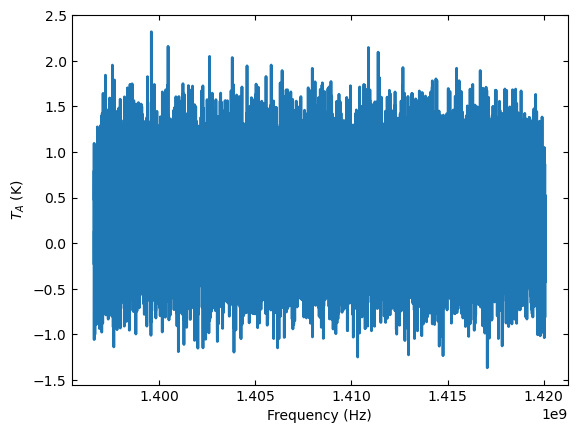

In [8]:
ps_sb[0].calibrated(70).plot()

This works! and all the individual integrations are calibrated (note however that there is a issue with integrations 75 and 151 of the `ScanBlock` -- see [Issue #103](https://github.com/GreenBankObservatory/dysh/issues/103).

There's something else odd, the `ScanBlock` only has one element. I would have expected to have one `Scan` object for every input scan.

With the current behavior all the integrations are part of the same `Scan`.

In [11]:
len(ps_sb)

1

In [12]:
ps_sb[0]._calibrated.shape

(152,)